# Logistic Regression
##### Author: Chenyang Skylar Li

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CSkylarL/DataScience-MachineLearning/blob/main/algorithm/supervised_machine_learning/logistic_regression.ipynb)

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Foundations](#mathematical-foundations)
    - [Logistic Regression Model Prediction](#logistic-regression-model-prediction)
    - [Cost Function](#cost-function)
    - [Weight Update Rule](#weight-update-rule)
3. [Learning Algorithm](#learning-algorithm)
    - [Define a Logistic Regression Class using batch gradient descent](#define-a-logistic-regression-class-using-batch-gradient-descent)
    - [Showcase the above LogisticRegressionGD Class in Breast Cancer dataset](#showcase-the-above-logisticregressiongd-class-in-breast-cancer-dataset)
    - [Use LogisticRegression() class provided by Scikit-Learn](#use-logisticregression-class-provided-by-scikit-learn)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)

## Introduction
Logistic regression, a statistical method introduced by statistician David Cox in 1958, is utilized for analyzing datasets where one or more independent variables determine an outcome measured with a dichotomous variable, meaning there are only two possible outcomes. It's primarily used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. The binary logistic regression model has been expanded over time to incorporate multiple independent variables and more than two categories of the dependent variable, an extension known as multinomial logistic regression (Softmax Regression).

## Mathematical Foundations

### Logistic Regression Model Prediction

The logistic regression model uses the logistic function to model the probability of the positive class given the input features. 


$$\hat{p} = h_{\theta}(\mathbf{x}) = \sigma(\theta^{\top}\mathbf{x})$$

where $\sigma(z)$ is the logistic function, — a sigmoid function that outputs a number between 0 and 1, when $z$ is negative and 1 when it is positive.

 $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

After estimating the probability $\hat{p} = h_{\theta}(x)$, the Logistic Regression model can predict $\hat{y}$ easily using below equation: 

$$
\hat{y} =
\begin{cases}
    0, & \text{if } \hat{p} < 0.5 \\
    1, & \text{if } \hat{p} \geq 0.5
\end{cases}
$$


### Cost Function

The cost function used in Logistic Regression is the log loss, defined as follows for a single instance ($y$ is 1 for positive instances and 0 for negative instances.):

$$J(\theta) = -[y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})]$$

From the perspective of Maximum Likelihood Estimation (MLE), the cost function of logistic regression is designed to maximize the probability (likelihood) of observing the given set of labels in our dataset given the input features and model parameters. If our model estimates a high probability for an observed positive instance (close to 1), the corresponding term in the likelihood becomes large, increasing the total likelihood. Similarly, if the model estimates a low probability for an observed negative instance (close to 0), this also increases the total likelihood. This is what we want — our aim is to maximize the likelihood of observing the given data. On the other hand, if the model estimates a low probability for an observed positive instance or a high probability for an observed negative instance, the corresponding term in the likelihood becomes small, decreasing the total likelihood. In terms of the cost function, which is the negative log-likelihood, this corresponds to a large cost. Therefore, the cost function is designed such that the cost (negative log-likelihood) is high when the model makes incorrect predictions and low when it makes correct predictions. This encourages the model to find parameters that maximize the likelihood of the observed data.

The cost function over the whole training set is the average cost over all training instances(log loss):

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]$$

### Weight Update Rule

There is no known closed-form equation to compute the value of $\theta$ that minimizes the cost function. However, this cost function is convex, so Gradient Descent (or any other optimization algorithm) is used to find the global minimum. 


The weights in logistic regression are updated during each iteration of the gradient descent algorithm according to the following rule:

$$\theta^{(j)} = \theta^{(j)} - \eta \frac{\partial}{\partial\theta^{(j)}} J(\theta)$$

where:

- $\theta^{(j)}$ is the j-th weight parameter,
- $\eta$ is the learning rate (a hyperparameter that determines the step size during each iteration),
- $J(\theta)$ is the cost function (negative log-likelihood in the case of logistic regression),
- $\frac{\partial}{\partial\theta^{(j)}} J(\theta)$ is the partial derivative of the cost function with respect to the j-th weight parameter, which can be calculated as follows:


    $$\frac{\partial}{\partial\theta^{(j)}} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [\sigma(\theta^T x^{(i)}) - y^{(i)}]x_j^{(i)}$$

    where:

    - $m$ is the number of instances in the dataset,
    - $\sigma(\cdot)$ is the logistic sigmoid function,
    - $x^{(i)}$ is the i-th instance,
    - $y^{(i)}$ is the actual output (class label) of the i-th instance,
    - $x_j^{(i)}$ is the j-th feature value of the i-th instance.


## Learning Algorithm

The learning algorithm for logistic regression aims to find the optimal weights that maximize the likelihood of the observed data. The most common method for doing this is Maximum Likelihood Estimation (MLE), which can be solved using gradient descent or other optimization algorithms.

1. Initialize the weights and bias to zero or small random values.
2. Calculate the gradient of the log-likelihood with respect to the weights and bias.
3. Update the weights and bias using the calculated gradient and a learning rate.
4. Repeat steps 2 and 3 for a specified number of iterations or until convergence.

### Define a Logistic Regression Class using batch gradient descent



In [12]:
import numpy as np

class LogisticRegressionGD:
    """
    Logistic Regression model trained using gradient descent.

    Parameters:
    learning_rate (float): The learning rate for the gradient descent algorithm.
    epochs (int): The number of iterations to run the gradient descent algorithm.

    Attributes:
    weights (numpy.ndarray): The weights for each feature in the input data.
    bias (float): The bias term in the logistic regression model.
    error (list): The error (log loss) at each epoch during training.

    Methods:
    _sigmoid(z) -> float: The sigmoid function used to compute the predicted probabilities.
    fit(X, y) -> None: Fit the logistic regression model to the training data.
    predict(X) -> list: Predict the class labels for the input data using the fitted model.
    """

    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the LogisticRegressionGD object.

        Args:
        learning_rate (float): The learning rate for the gradient descent algorithm.
        epochs (int): The number of iterations to run the gradient descent algorithm.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None  # Initialize the weights to None
        self.bias = None  # Initialize the bias to None
        self.error = []

    def _sigmoid(self, z):
        """
        Compute the sigmoid function for the given input.

        Args:
        z (numpy.ndarray): The input to the sigmoid function.

        Returns:
        float: The output of the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Args:
        X (numpy.ndarray): The input training data of shape (n_samples, n_features).
        y (numpy.ndarray): The target training data of shape (n_samples,).

        Returns:
        None
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) # Initialize the weights to zeros
        # self.weights = np.random.randn(n_features)  # Use this line to replace aboveline if you want to initialize the weights randomly
        self.bias = 0 # Initialize the bias to zero

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias # Compute the linear combination
            y_pred = self._sigmoid(z) # Compute the predicted probabilities

            # Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) 
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute the error (log loss) for this epoch and store it
            error = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.error.append(error)

    def predict(self, X):
        """
        Predict the class labels for the input data using the fitted model.

        Args:
        X (numpy.ndarray): The input data of shape (n_samples, n_features).

        Returns:
        list: The predicted class labels (0 or 1) for each input sample.
        """
        # Compute the linear combination and predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # Return the predicted class labels
        return [1 if p >= 0.5 else 0 for p in y_pred]

### Showcase the above LogisticRegressionGD Class in Breast Cancer dataset

The `Breast Cancer` dataset is a classic and very easy binary classification dataset. It contains 569 instances, 212 malignant and 357 benign. Each instance contains the measurements of 30 different features, all real-valued numerical features that have been computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the image. Please refer to the corresponding [data notebook](../../data/breast_cancer/breast_cancer.ipynb) for more information about the dataset.

In [13]:
# Import the required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

X.shape:  (569, 30) y.shape:  (569,)
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names: ['malignant' 'benign']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 n

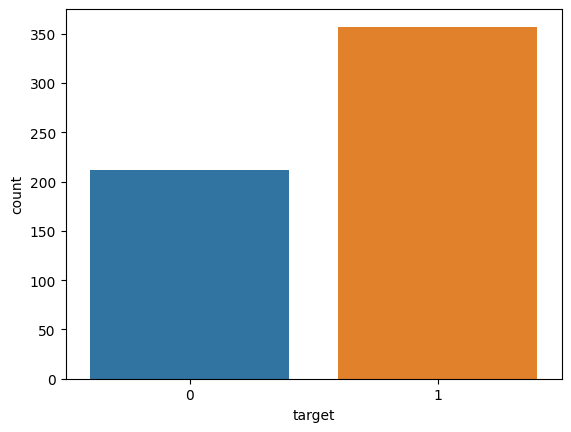

In [14]:
# Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer(as_frame=True)
X, y = cancer.data, cancer.target
print("X.shape: ",X.shape, "y.shape: ", y.shape)
print("feature names:", cancer.feature_names)
print("target names:", cancer.target_names)

# Feature information
X.info()
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=y)
plt.show()



Accuracy: 0.9824561403508771
AUC: 0.9813298395021289


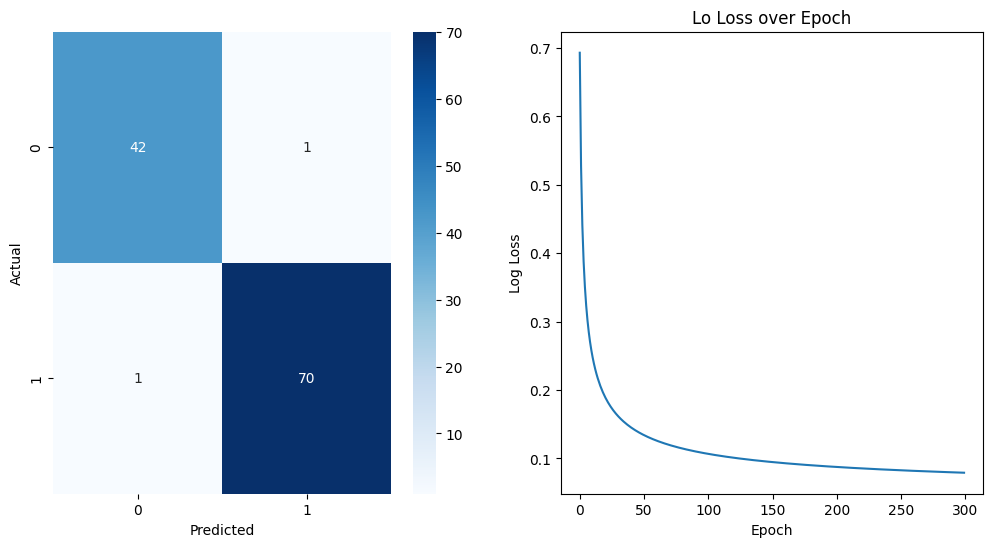

In [15]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the LogisticRegressionGD model and fit the training data
lr = LogisticRegressionGD(learning_rate=0.1, epochs=300)
lr.fit(X_train, y_train)

# Make predictions using the test set
y_pred = lr.predict(X_test)

# Evaluate the performance of the classifier using the accuracy score and confusion matrix
# Calculate the accuracy of the classifier by comparing the predicted labels to the actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Generate a confusion matrix of the predicted and actual labels
cm = confusion_matrix(y_test, y_pred)

# plot results
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", ax=ax1)

# Set the x and y axis labels for the plot
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

# Plot the log loss over the epochs
ax2.plot(range(lr.epochs), lr.error)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Log Loss")
ax2.set_title("Lo Loss over Epoch")

# Show the plot
plt.show()




### Use LogisticRegression() class provided by Scikit-Learn

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class provided by Scikit-Learn is a more advanced implementation of Logistic Regression that supports multi-class classification and can automatically handle one-vs-all or one-vs-rest binary classification. It also supports regularization and can be used to train large datasets efficiently.Its default solver is lbfgs([L-BFGS-B, Limited-memory BFGS](http://users.iems.northwestern.edu/~nocedal/lbfgsb.html)), instead of the batch gradient descent mentioned above.

Accuracy: 0.9736842105263158
AUC: 0.969701932525385


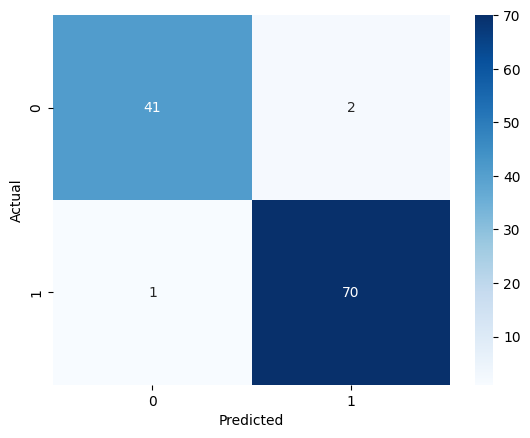

In [16]:
# Delete the LogisticRegressionGD object
del lr, LogisticRegressionGD

# Import the required packages
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
log_reg = LogisticRegression()
# Fit the training data
log_reg.fit(X_train, y_train)

# Make predictions using the test set
y_pred_new = log_reg.predict(X_test)

# Evaluate the performance of the classifier using the accuracy score and confusion matrix
# Calculate the accuracy of the classifier by comparing the predicted labels to the actual labels
accuracy = accuracy_score(y_test, y_pred_new)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_new)
print("AUC:", auc)

# Generate a confusion matrix of the predicted and actual labels
cm = confusion_matrix(y_test, y_pred_new)


# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set the x and y axis labels for the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


## Pros and Cons

**Pros:**

- Simple and easy to implement.
- Efficient and scalable for large datasets.
- Can be easily extended to multiclass classification using techniques like one-vs-rest or one-vs-one.
- Provides probabilities for outcomes, which can be useful for ranking or thresholding.

**Cons:**

- Assumes a linear relationship between the log-odds of the dependent variable and the independent variables.
- May not perform well on non-linear or complex data.
- Can be sensitive to multicollinearity and the choice of learning rate.

## Suitable Tasks and Datasets

Logistic regression is a popular statistical method used for binary classification problems. It is particularly useful when the dependent variable is dichotomous (binary), i.e., it takes on only two values, such as yes or no, true or false, and so on. Here are some suitable tasks and datasets for logistic regression:

1. **Spam Detection**: This is a classic application of logistic regression. The goal is to predict whether an email is spam or not based on its content. The dataset contains labeled examples of spam and non-spam emails.

2. **Credit Risk Analysis**: Logistic regression can be used to predict the likelihood of default by a borrower. The dataset contains features such as credit score, income, debt-to-income ratio, and others.

3. **Medical Diagnosis**: Logistic regression is commonly used in medical research to predict the likelihood of a particular disease. The dataset contains features such as age, sex, family history, and other health metrics.

4. **Customer Churn Analysis**: Logistic regression can be used to predict whether a customer is likely to leave a company based on their usage pattern, customer service interactions, and other factors.

5. **Social Network Analysis**: Logistic regression can be used to predict whether a user is likely to engage with a particular post, based on their past behavior on the social network.

6. **Fraud Detection**: Logistic regression can be used to predict whether a financial transaction is fraudulent or not. The dataset contains features such as transaction amount, location, and time of day.

Here are some datasets that are commonly used for logistic regression:
1. **Titanic dataset**: A dataset containing information about the passengers on the Titanic, including whether they survived or not.
2. **Breast cancer dataset**: A dataset containing information about breast cancer tumors, including whether they are malignant or benign.
3. **Iris dataset**: A dataset containing information about iris flowers, including their sepal length and width, petal length and width, and species.
4. **Diabetes dataset**: A dataset containing information about diabetes patients, including their glucose and insulin levels, age, and other factors.
5. **Heart disease dataset**: A dataset containing information about patients with heart disease, including their age, sex, cholesterol levels, and other factors.

## References

1. Cox, D. R. (1958). The regression analysis of binary sequences. Journal of the Royal Statistical Society: Series B (Methodological), 20(2), 215-232.
2. Hosmer Jr, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied logistic regression (Vol. 398). John Wiley & Sons.
3. Scikit-Learn Logistic Regression Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".